In [40]:
#  !pip install sidetable
#  !pip install tabulate

In [41]:
import pandas as pd;import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sidetable as stb

from IPython.display import HTML, display
import tabulate
import re
%matplotlib inline

## Read the data to Pandas Data Frame

In [42]:
df = pd.read_csv("https://raw.githubusercontent.com/psiva2019/Hackathon/master/Algoritmo/Data/Train_Set.csv",error_bad_lines=False)
df_test = pd.read_csv("https://raw.githubusercontent.com/psiva2019/Hackathon/master/Algoritmo/Data/Test_Set.csv",error_bad_lines=False)
df.head(10)

,OrderId,Customer_Id,Customer_Category,Cust_State,Zipcode,Sales,Order_zone,Price,CategoryName,Transcation,Dept_Id,Dept_Name,Profit_Ratio,Discount,Quantity,Order_Profit,Product_type,Prod_Category_Id,ProductLength,ProductWeight,Dispatched,Shipping_Class,Scheduled_Shipping,Warehouse_Region,Delivery_Review,Session_Ordered,WeekdayOrder,Delivery_Status
0,2477882,12386,Consumer,AR,19120,150.0,Central,4383.39,Cat-2,UPI,4,Apparel,0.08,0.10,3,352.78,Fragile,17,191.0,1592.0,0,Standard,4,NORTH,5.0,2.0,0,0
1,2477895,2630,Consumer,BR,2907,165.0,East,4295.72,Cat-2,UPI,4,Apparel,0.47,0.16,3,2018.10,Fragile,17,79.0,1420.0,0,Standard,6,NORTH,2.0,2.0,1,0
2,2473260,1752,Corporate,RJ,90214,171.0,South,3616.65,Cat-50,Cash,7,Fan Shop,0.26,0.07,4,939.63,Not Fragile,46,67.0,1231.0,0,Standard,6,SOUTH,4.0,2.0,0,1
3,2466916,9268,Consumer,UP,745,132.0,East,9175.86,Cat-12,Credit,4,Apparel,0.48,0.18,1,4401.74,Not Fragile,18,45.0,NaN,1,2A,4,NORTH,4.0,3.0,1,1
4,2351480,2888,Corporate,UP,92427,NaN,North,2779.29,Cat-3,UPI,5,Golf,0.13,0.16,4,361.70,Not Fragile,29,43.0,1018.0,1,Standard,5,CENTRAL,2.0,1.0,0,1
5,2505273,5971,others,UP,10470,144.0,Central,4226.54,Cat-2,Debit,4,Apparel,0.34,0.06,2,1435.24,Fragile,17,48.0,271.0,1,Standard,5,CENTRAL,4.0,3.0,1,1
6,2374621,4228,others,JK,20799,160.0,North,2787.77,Cat-42,Debit,6,Outdoors,0.19,0.25,4,529.61,Fragile,35,195.0,1417.0,1,Elite,4,SOUTH,4.0,3.0,0,0
7,2402171,12250,Corporate,UP,77113,202.0,Central,21374.50,Cat-13,Debit,7,Fan Shop,0.35,0.25,1,7479.16,Not Fragile,43,173.0,16563.0,1,Standard,6,NORTH,3.0,1.0,1,1
8,2497815,9012,Consumer,BR,743,373.0,Central,28399.01,Cat-32,UPI,7,Fan Shop,0.02,0.06,1,570.15,Fragile,45,104.0,3493.0,1,1A,2,NORTH,3.0,2.0,1,1
9,2477174,6134,Consumer,MA,97221,112.0,West,2979.73,Cat-3,UPI,5,Golf,0.11,0.18,2,329.22,Fragile,29,30.0,655.0,0,Standard,3,SOUTH,4.0,1.0,0,0


## Data Report

In [43]:
#Shape of the Data
print('****Shape of the hotel data****')
print('********************************')
print('No of rows\t:\t{}\nNo of columns\t:\t{}'.format(df.shape[0],df.shape[1]))

****Shape of the hotel data****
********************************
No of rows	:	126363
No of columns	:	28


In [44]:
print('****Show infomation of the train data****')
print('***********************************')
df.info()

****Show infomation of the train data****
***********************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126363 entries, 0 to 126362
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   OrderId             126363 non-null  int64  
 1   Customer_Id         126363 non-null  int64  
 2   Customer_Category   126363 non-null  object 
 3   Cust_State          126363 non-null  object 
 4   Zipcode             126363 non-null  int64  
 5   Sales               122749 non-null  float64
 6   Order_zone          126363 non-null  object 
 7   Price               126363 non-null  float64
 8   CategoryName        126363 non-null  object 
 9   Transcation         126363 non-null  object 
 10  Dept_Id             126363 non-null  int64  
 11  Dept_Name           126363 non-null  object 
 12  Profit_Ratio        126363 non-null  float64
 13  Discount            121313 non-null  float64
 14  Quanti

In [45]:
#Check for duplicate values
print('****Duplicates data in the train dataset without EmployeeID Column****')
print('**********************************************************************')

dups = df.loc[:, ~df.columns. isin(['EmployeeID'])].duplicated().sum()
if dups ==0:
    print('There is no duplicate values in the data.') 
else:
    print('There are {} duplicates in the data which is {}% of total data'.format(dups,round((dups/df.shape[0])*100,2)))

****Duplicates data in the train dataset without EmployeeID Column****
**********************************************************************
There is no duplicate values in the data.


In [46]:
#Check for missing value
print('****Missing Values in the Dataset****')
print('*************************************')
msv = df.isnull().sum()[df.isnull().sum()>0]
if msv.empty:
    print('There is no missing values in the data.') 
else:
    for i in range(msv.count()):
        print('{} Missing values in {} which is {}% of total data ({})'.format(msv[i],msv.index[i],round(((msv[i]/df.shape[0])*100),2),df[msv.index[i]].dtype))

****Missing Values in the Dataset****
*************************************
3614 Missing values in Sales which is 2.86% of total data (float64)
5050 Missing values in Discount which is 4.0% of total data (float64)
2946 Missing values in ProductLength which is 2.33% of total data (float64)
695 Missing values in ProductWeight which is 0.55% of total data (float64)
9065 Missing values in Delivery_Review which is 7.17% of total data (float64)
4792 Missing values in Session_Ordered which is 3.79% of total data (float64)


In [60]:
#Check for missing value
print('****Missing Values in the Dataset****')
print('*************************************')
msv = df_test.isnull().sum()[df_test.isnull().sum()>0]
if msv.empty:
    print('There is no missing values in the data.') 
else:
    for i in range(msv.count()):
        print('{} Missing values in {} which is {}% of total data ({})'.format(msv[i],msv.index[i],round(((msv[i]/df_test.shape[0])*100),2),df_test[msv.index[i]].dtype))

****Missing Values in the Dataset****
*************************************
1460 Missing values in Sales which is 2.7% of total data (float64)
2174 Missing values in Discount which is 4.01% of total data (float64)
1304 Missing values in ProductLength which is 2.41% of total data (float64)
307 Missing values in ProductWeight which is 0.57% of total data (float64)
3896 Missing values in Delivery_Review which is 7.19% of total data (object)
2031 Missing values in Session_Ordered which is 3.75% of total data (object)


In [47]:
def display_dataframe(df,dtypeval):
    numeric_col_mask = df.dtypes.apply(lambda d: issubclass(np.dtype(d).type, dtypeval))

    # Dict used to center the table headers
    d = dict(selector="th",
        props=[('text-align', 'left')])

    # Style
    display(df.style.set_properties(subset=df.columns[numeric_col_mask], 
                            **{'width':'15em', 'height':'3em','text-align':'left','border-color':'White','border-width':'thin'})\
            .set_properties(subset=df.columns[~numeric_col_mask], 
                            **{'width':'15em', 'text-align':'left','border-color':'White','border-width':'thin'})\
            .format(lambda x: '{:,.0f}'.format(x) if x > 1e3 else '{:,.2f}'.format(x), # format the numeric values
                    subset=pd.IndexSlice[:,df.columns[numeric_col_mask]])\
            .hide_index()\

#            .highlight_max('color: green')\
            .set_table_styles([d])) # center the header

In [48]:
cvar = ['Dept_Id','Dispatched','Scheduled_Shipping','Delivery_Review','Session_Ordered','WeekdayOrder']
for var in cvar:
    df[var] = df[var].astype('object')
    df_test[var] = df_test[var].astype('object')

In [49]:
for var in df.columns:
  if(df[var].dtype=='object'):
    print(f'**** Unique Counts of {var}****')
    print(df[var].value_counts())
    print('\n')

**** Unique Counts of Customer_Category****
Consumer     65464
Corporate    38360
others       22539
Name: Customer_Category, dtype: int64


**** Unique Counts of Cust_State****
AR     7105
RJ     7104
MP     7077
JK     7072
AP     7065
PB     7046
MA     7041
HP     7032
HR     7027
OR     7023
BR     7020
TEL    7000
KL     6980
GJ     6979
UP     6978
KA     6974
WB     6945
UK     6895
Name: Cust_State, dtype: int64


**** Unique Counts of Order_zone****
North      25375
South      25327
East       25257
Central    25230
West       25174
Name: Order_zone, dtype: int64


**** Unique Counts of CategoryName****
Cat-2     17297
Cat-12    15489
Cat-4     14762
Cat-50    13551
Cat-32    12223
Cat-49    10810
Cat-13     9564
Cat-7      8735
Cat-3      7593
Cat-5      2203
Cat-20     1232
Cat-27     1016
Cat-19      854
Cat-42      799
Cat-8       667
Cat-41      609
Cat-11      458
Cat-21      448
Cat-29      447
Cat-37      418
Cat-15      405
Cat-48      375
Cat-44      365
Cat-22     

In [61]:
cvar = ['Sales','Discount','ProductLength','ProductWeight']
for var in cvar:
  df[var].fillna(df[var].median(),inplace=True)
  df_test[var].fillna(df_test[var].median(),inplace=True)

cvar = ['Delivery_Review','Session_Ordered']
for var in cvar:
  df[var].fillna(df[var].mode()[0],inplace=True)
  df_test[var].fillna(df_test[var].mode()[0],inplace=True)

In [53]:
#Check for missing value
print('****Missing Values in the Dataset****')
print('*************************************')
msv = df.isnull().sum()[df.isnull().sum()>0]
if msv.empty:
    print('There is no missing values in the data.') 
else:
    for i in range(msv.count()):
        print('{} Missing values in {} which is {}% of total data ({})'.format(msv[i],msv.index[i],round(((msv[i]/df.shape[0])*100),2),df[msv.index[i]].dtype))

****Missing Values in the Dataset****
*************************************
There is no missing values in the data.


In [54]:
def unq_count_new(df,var,top_val,tit,dpn):
    #var='meal'

    if(top_val == 0):
        perclass = pd.DataFrame(df[var].value_counts(normalize=True,dropna=dpn))
        tardisval = pd.DataFrame(df[var].value_counts(dropna=dpn))
    else:
        perclass = pd.DataFrame(df[var].value_counts(normalize=True,dropna=dpn)[df[var].value_counts(dropna=dpn)>top_val])
        tardisval = pd.DataFrame(df[var].value_counts(dropna=dpn)[df[var].value_counts(dropna=dpn)>top_val])
        
    disdf = pd.concat([tardisval,round(perclass*100,3)],axis=1)
    disdf.reset_index()
    disdf.columns=['Count','Percent']

    str1 = f'**** Unique value distribution of {tit.title()} ******'

    width = len(str1)
    filler = '*'

    print(str1)
    print(f'{"*" :{filler}>{width}}\n')

    print(tabulate.tabulate(disdf, tablefmt='fancy_grid',headers=[tit.title(),'Count','Percent']))
    #return (disdf)

In [58]:
# dff=df
# typevar='char'
# var='coupon_used_for_payment'
# tar='Churn'
# tit='coupon_used_for_payment'

# textlab='# of Customers'
# textlab_tar='# of Churn Customers'


# result = dff.groupby([var])[tar].aggregate(np.sum).reset_index().sort_values(tar,ascending = False)
# #print(result[result[tar]>0])
# result = result[result[tar]>0]
# b = sns.barplot(data=result, y=var,x=tar,orient='h',order=result[var])


# b.set_frame_on(False)

# b.set_ylabel('')
# #b.set_ylabel(var,weight='bold')
# b.set_xlabel(textlab_tar,weight='bold')

# b.set_xticklabels([])
# b.tick_params(bottom=False)
# b.set_yticklabels(list(result[var].value_counts().index),weight='bold')
# #b.set_yticklabels([])
# maxwidth = dff[var].value_counts().max()
# for p in b.patches:
#     width = np.nan_to_num(p.get_width()) 
#     wdplace = width
#     per = (width/dff.shape[0])*100
#     wdplace = wdplace + maxwidth * 1/100
    
#     b.text(wdplace,
#         p.get_y()+.5,
#         '{} - ({:1.2f}%)'.format(round(width),(width/dff.shape[0])*100),
#         ha="center",weight='bold') 

In [59]:
# dff=df
# typevar='char'
# var='coupon_used_for_payment'
# tar='Churn'
# tit='coupon_used_for_payment'

# textlab='# of Customers'
# textlab_tar='# of Churn Customers'

# fig, axis=plt.subplots(nrows=1,ncols=2)
# fig.set_size_inches(15,4)

# a = sns.countplot(data=dff, y=var,ax=axis[0],order=dff[var].value_counts().index)

# a.set_frame_on(False)

# #a.set_ylabel(var,weight='bold')
# a.set_ylabel('')
# a.set_xlabel(textlab,weight='bold')


# a.set_xticklabels([])
# a.tick_params(bottom=False)
# a.set_yticklabels(list(dff[var].value_counts().index),weight='bold')

# maxwidth = dff[var].value_counts().max()

# for p in a.patches:
#     width = np.nan_to_num(p.get_width()) 
#     wdplace = width
#     per = (width/dff.shape[0])*100
#     #print(width)
#     wdplace = wdplace + maxwidth * 10/100
#     # if(per < 1):
#     #     wdplace = wdplace + maxwidth * 10/100
#     # else:
#     #     wdplace = wdplace - maxwidth * 10/100
    
#     a.text(wdplace,
#         p.get_y()+.5,
#         '{} - ({:1.2f}%)'.format(round(width),per),
#         ha="center",weight='bold') 

### Univarient Analsyis

In [122]:
def display_unq(dff,var,tar,bins,typevar,tit,textlab,textlab_tar,iwidth,iheight):
  if(typevar=='num'):
    fig, axis=plt.subplots(nrows=1,ncols=3)
    fig.set_size_inches(iwidth,iheight)

    str1 = f'**** {tit.title()} ****'

    width = len(str1)
    filler = '*'

    print(str1)
    print(f'{"*" :{filler}>{width}}\n')

    dff_r = pd.DataFrame(round(dff[var].describe(),2)).T
    print(tabulate.tabulate(dff_r, tablefmt='fancy_grid',headers=dff_r.columns))
    
    str2 = f'\n**** Visuallations of Feature {tit.title()} ****'

    width = len(str2)
    filler = '*'

    print(str2)
    print(f'{"*" :{filler}>{width}}\n')

    a= sns.histplot(dff[var],ax=axis[0],bins=bins);
    b= sns.boxplot(dff[var],ax=axis[1]);
    c= sns.kdeplot(dff[var],ax=axis[2],hue=df[tar])

    a.set_xlabel('')
    b.set_xlabel('')
    c.set_xlabel('')
    a.set_ylabel('')
    c.set_ylabel('')

    a.set_frame_on(False)
    b.set_frame_on(False)
    c.set_frame_on(False)

  else:
    fig, axis=plt.subplots(nrows=1,ncols=2)
    fig.set_size_inches(iwidth,iheight)

    #unq_count_new(dff,var,0,tit,True)

    str2 = f'\n**** Visuallations of Feature {tit.title()} ****'

    width = len(str2)
    filler = '*'

    print(str2)
    print(f'{"*" :{filler}>{width}}\n')

    a = sns.countplot(data=dff, y=var,ax=axis[0],order=dff[var].value_counts().index)

    a.set_frame_on(False)

    #a.set_ylabel(var,weight='bold')
    a.set_ylabel('')
    a.set_xlabel(textlab,weight='bold')


    a.set_xticklabels([])
    a.tick_params(bottom=False)
    a.set_yticklabels(list(dff[var].value_counts().index),weight='bold')

    for p in a.patches:
        width = np.nan_to_num(p.get_width()) 
        width_1 = width
        per = (width/dff.shape[0])*100
        #print(width,p.get_y(),per)

        if(per < 1):
            width = width + 750
        else:
            width = width + 220
        
        a.text(width,
            p.get_y()+.5,
            '{} - ({:1.2f}%)'.format(width_1,(width_1/dff.shape[0])*100),
            ha="center",weight='bold') 
    
    result = dff.groupby([var])[tar].aggregate(np.sum).reset_index().sort_values(tar,ascending = False)
    result = result[result[tar]>0]
    b = sns.barplot(data=result, y=var,x=tar,orient='h',order=result[var],ax=axis[1])

    b.set_frame_on(False)

    b.set_ylabel('')
    #b.set_ylabel(var,weight='bold')
    b.set_xlabel(textlab_tar,weight='bold')

    b.set_xticklabels([])
    b.tick_params(bottom=False)
    b.set_yticklabels(list(result[var].value_counts().index),weight='bold')
    b.set_yticklabels([])

    for p in b.patches:
        width = np.nan_to_num(p.get_width()) 
        width_1 = width
        per = (width/dff.shape[0])*100
        #print(width,p.get_y(),per)

        if(per < 1):
            width = width + 750
        else:
            width = width + 20
        
        b.text(width,
            p.get_y()+.5,
            '{} - ({:1.2f}%)'.format(width_1,(width_1/dff.shape[0])*100),
            ha="center",weight='bold') 



**** Visuallations of Feature Customer Category ****
*****************************************************



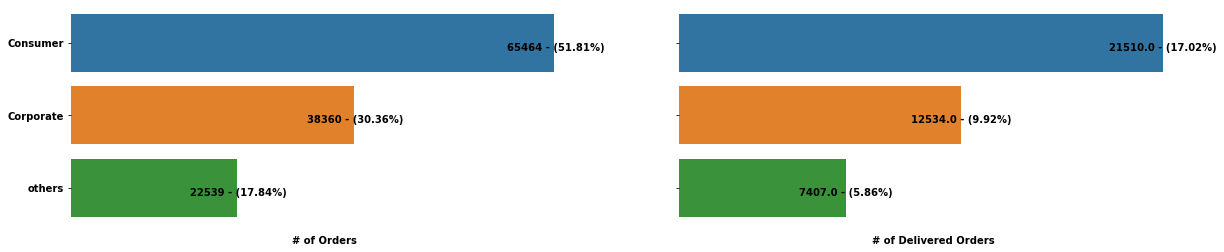

In [104]:
textlab='# of Orders'
textlab_tar='# of Delivered Orders'

display_unq(df,'Customer_Category','Delivery_Status',10,'chars','Customer Category',textlab,textlab_tar,20,4)


**** Visuallations of Feature Customer State ****
**************************************************



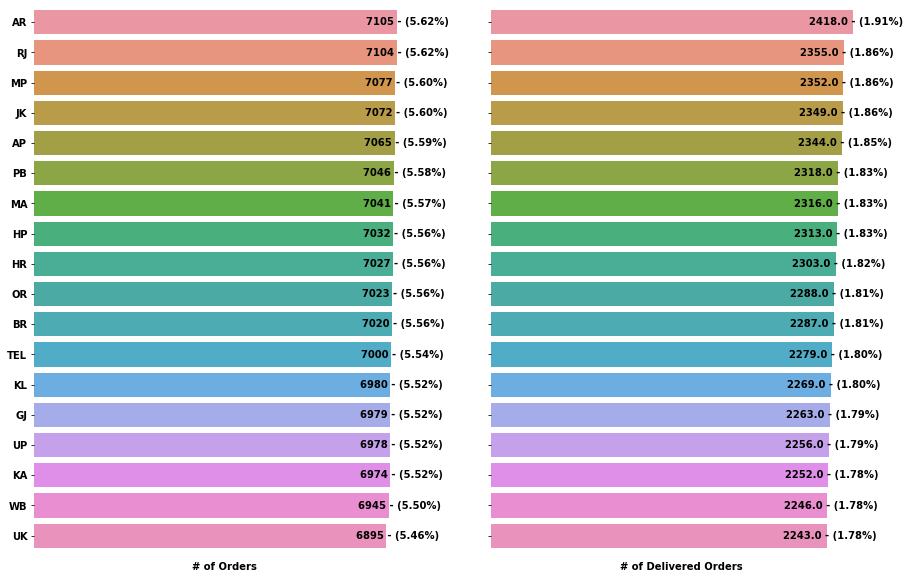

In [105]:
display_unq(df,'Cust_State','Delivery_Status',10,'chars','Customer State',textlab,textlab_tar,15,10)


**** Visuallations of Feature Order Zone ****
**********************************************



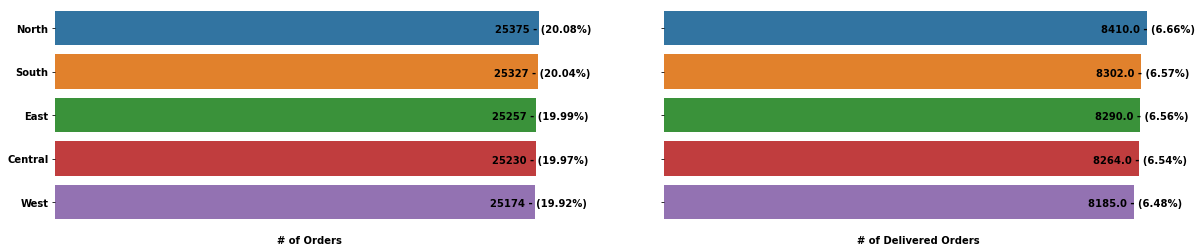

In [106]:
display_unq(df,'Order_zone','Delivery_Status',10,'chars','Order zone',textlab,textlab_tar,20,4)


**** Visuallations of Feature Category Name ****
*************************************************



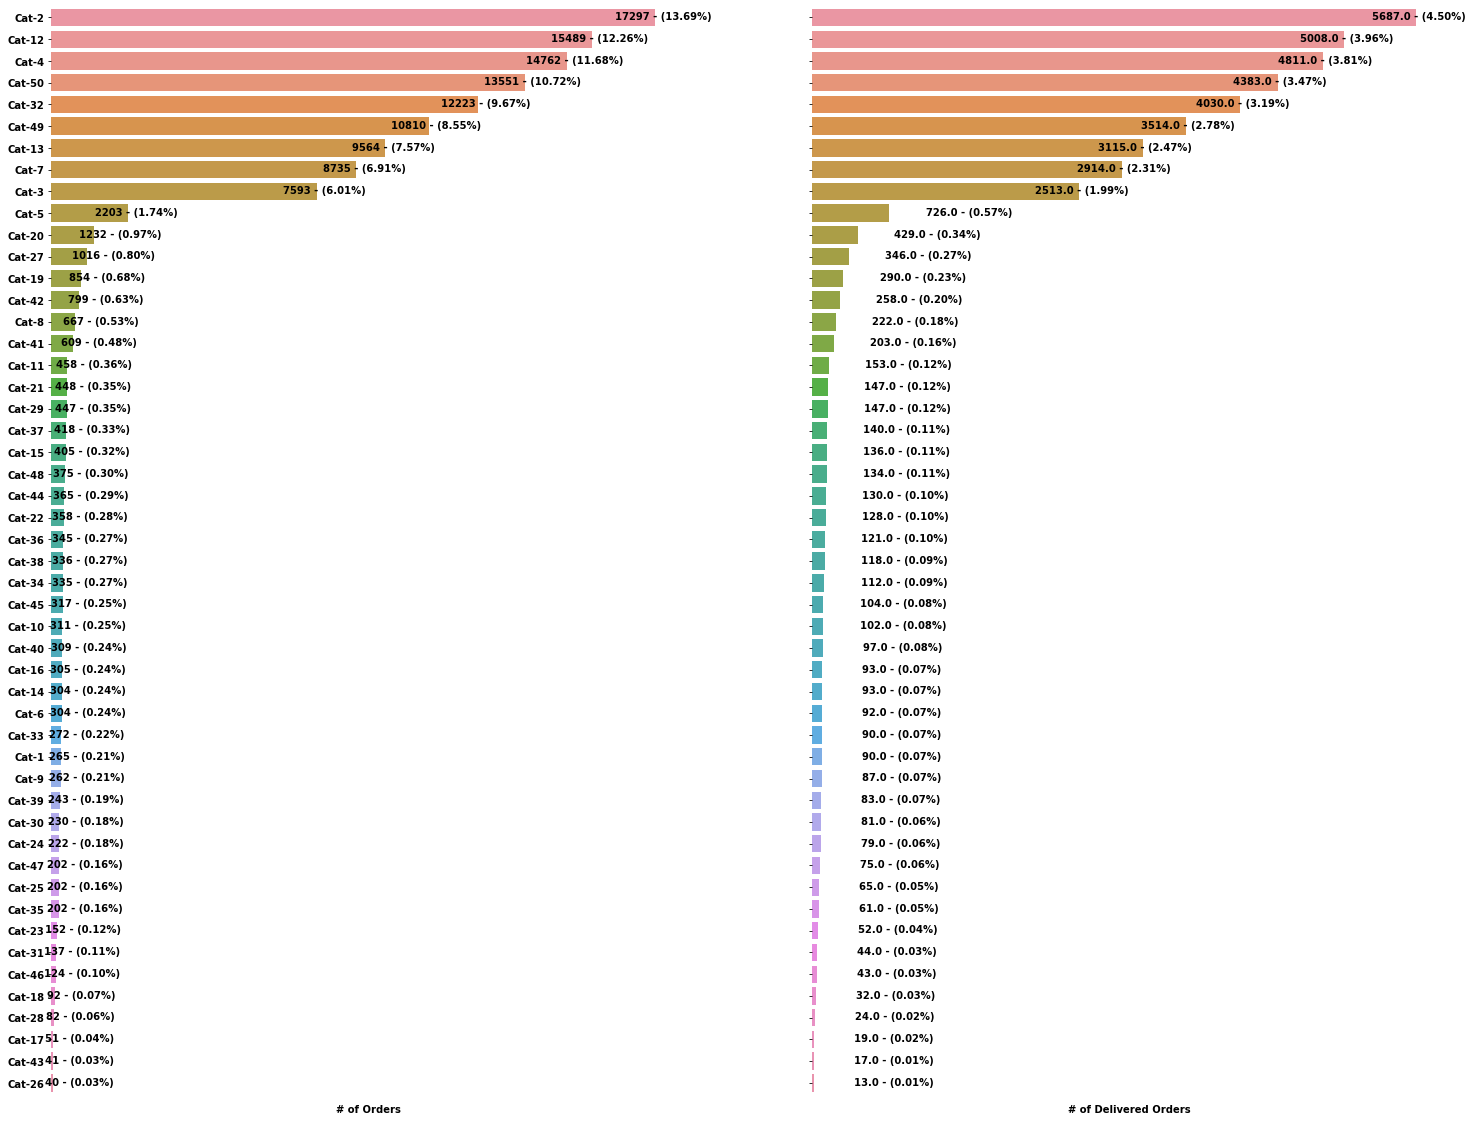

In [107]:
display_unq(df,'CategoryName','Delivery_Status',10,'chars','Category Name',textlab,textlab_tar,25,20)


**** Visuallations of Feature Transcation ****
***********************************************



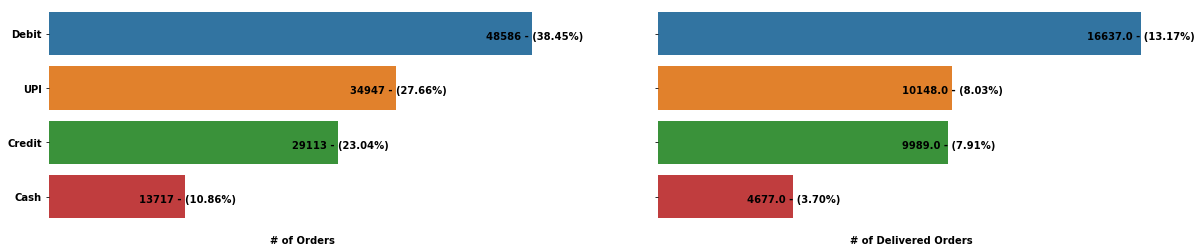

In [108]:
display_unq(df,'Transcation','Delivery_Status',10,'chars','Transcation',textlab,textlab_tar,20,4)


**** Visuallations of Feature Dept Name ****
*********************************************



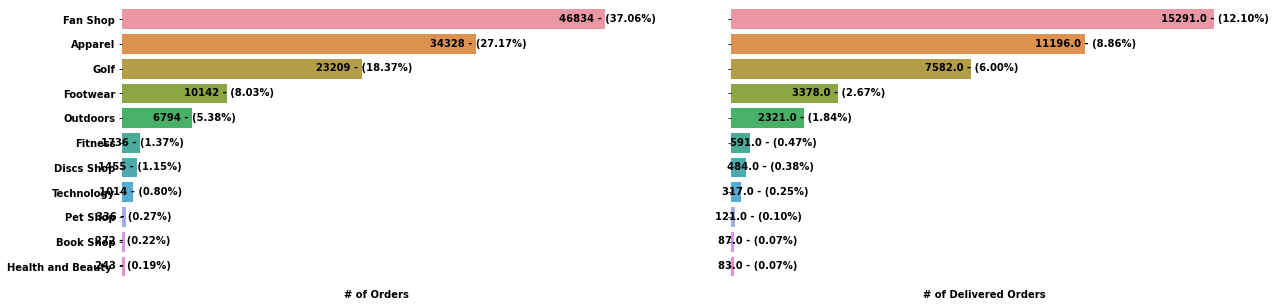

In [109]:
display_unq(df,'Dept_Name','Delivery_Status',10,'chars','Dept Name',textlab,textlab_tar,20,5)


**** Visuallations of Feature Dispatched ****
**********************************************



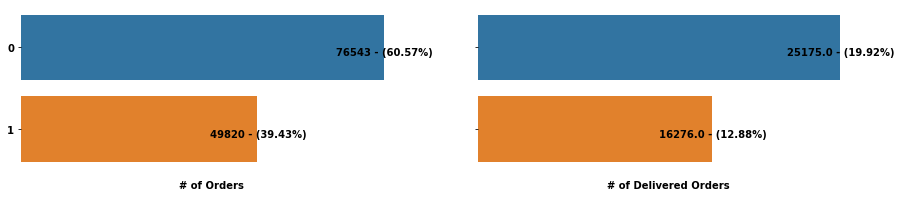

In [110]:
display_unq(df,'Dispatched','Delivery_Status',10,'chars','Dispatched',textlab,textlab_tar,15,3)


**** Visuallations of Feature Shipping Class ****
**************************************************



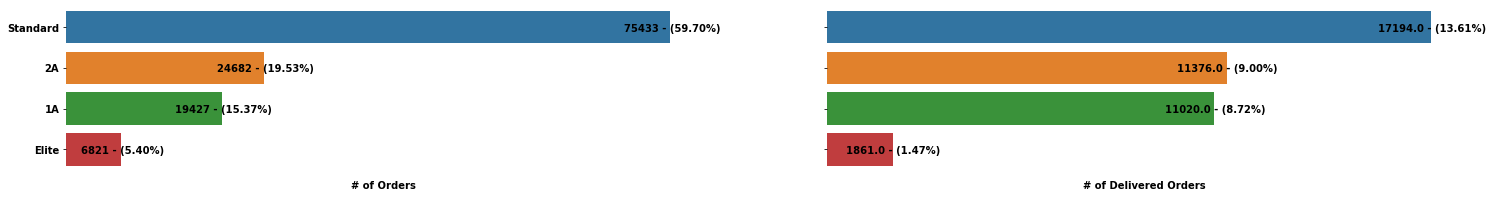

In [111]:
display_unq(df,'Shipping_Class','Delivery_Status',10,'chars','Shipping Class',textlab,textlab_tar,25,3)


**** Visuallations of Feature Scheduled Shipping ****
******************************************************



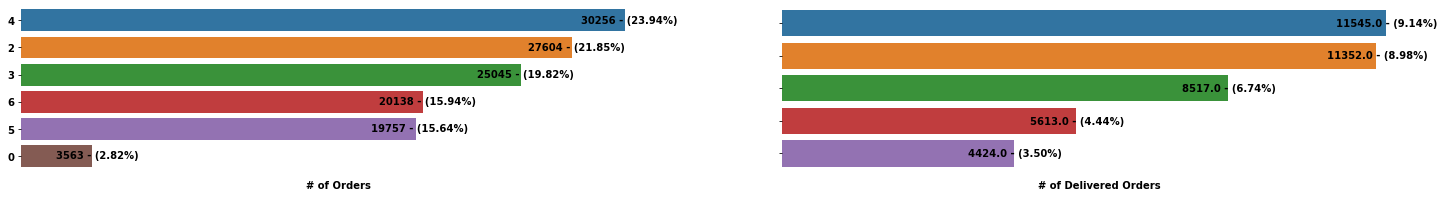

In [112]:
display_unq(df,'Scheduled_Shipping','Delivery_Status',10,'chars','Scheduled Shipping',textlab,textlab_tar,25,3)


**** Visuallations of Feature Warehouse Region ****
****************************************************



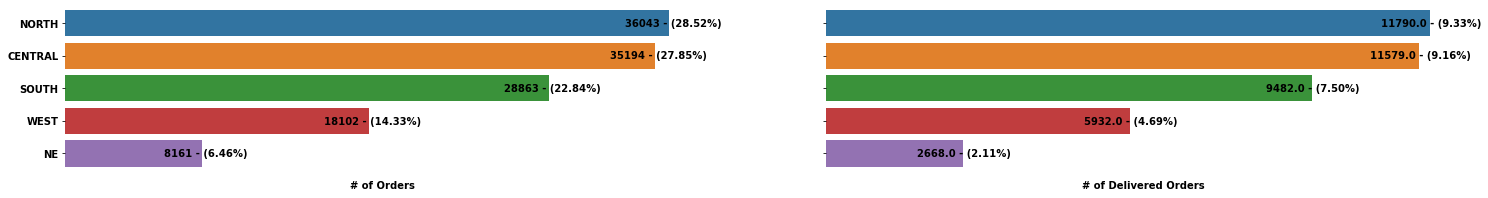

In [113]:
display_unq(df,'Warehouse_Region','Delivery_Status',10,'chars','Warehouse Region',textlab,textlab_tar,25,3)


**** Visuallations of Feature Delivery Review ****
***************************************************



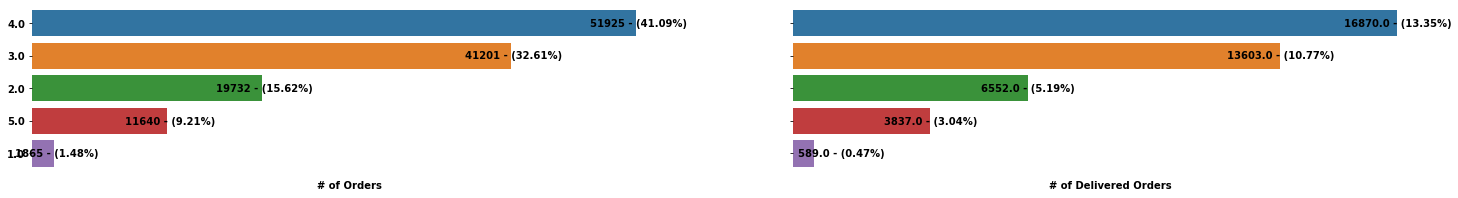

In [114]:
display_unq(df,'Delivery_Review','Delivery_Status',10,'chars','Delivery Review',textlab,textlab_tar,25,3)


**** Visuallations of Feature Session Ordered ****
***************************************************



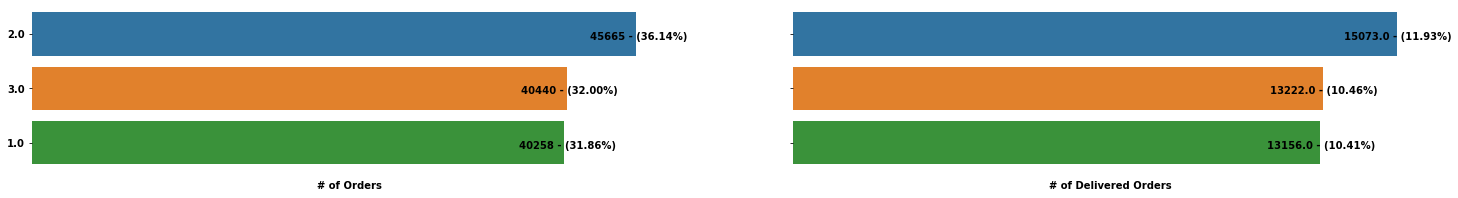

In [115]:
display_unq(df,'Session_Ordered','Delivery_Status',10,'chars','Session Ordered',textlab,textlab_tar,25,3)


**** Visuallations of Feature Weekday Order ****
*************************************************



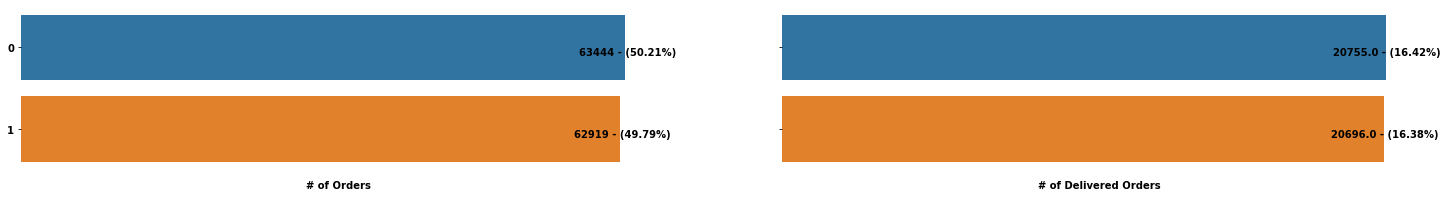

In [116]:
display_unq(df,'WeekdayOrder','Delivery_Status',10,'chars','Weekday Order',textlab,textlab_tar,25,3)

**** Sales ****
***************

╒═══════╤═════════╤════════╤════════╤═══════╤═══════╤═══════╤═══════╤═══════╕
│       │   count │   mean │    std │   min │   25% │   50% │   75% │   max │
╞═══════╪═════════╪════════╪════════╪═══════╪═══════╪═══════╪═══════╪═══════╡
│ Sales │  126363 │ 195.46 │ 119.76 │    28 │   114 │   173 │   257 │  1969 │
╘═══════╧═════════╧════════╧════════╧═══════╧═══════╧═══════╧═══════╧═══════╛

**** Visuallations of Feature Sales ****
*****************************************



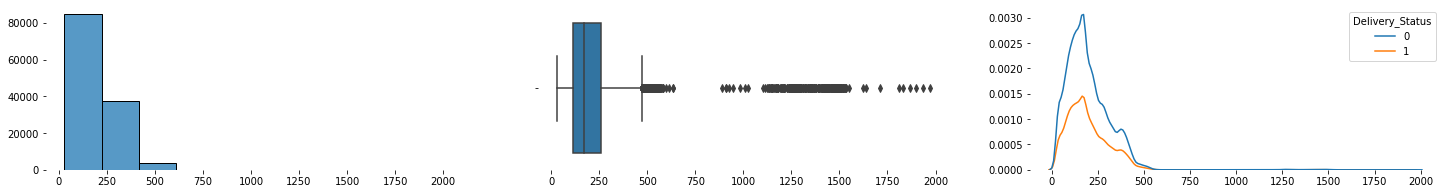

In [123]:
display_unq(df,'Sales','Delivery_Status',10,'num','Sales',textlab,textlab_tar,25,3)

**** Price ****
***************

╒═══════╤═════════╤═════════╤═════════╤════════╤═════════╤═════════╤═════════╤════════╕
│       │   count │    mean │     std │    min │     25% │     50% │     75% │    max │
╞═══════╪═════════╪═════════╪═════════╪════════╪═════════╪═════════╪═════════╪════════╡
│ Price │  126363 │ 10064.8 │ 9923.79 │ 617.31 │ 3587.76 │ 4415.28 │ 14222.4 │ 142151 │
╘═══════╧═════════╧═════════╧═════════╧════════╧═════════╧═════════╧═════════╧════════╛

**** Visuallations of Feature Price ****
*****************************************



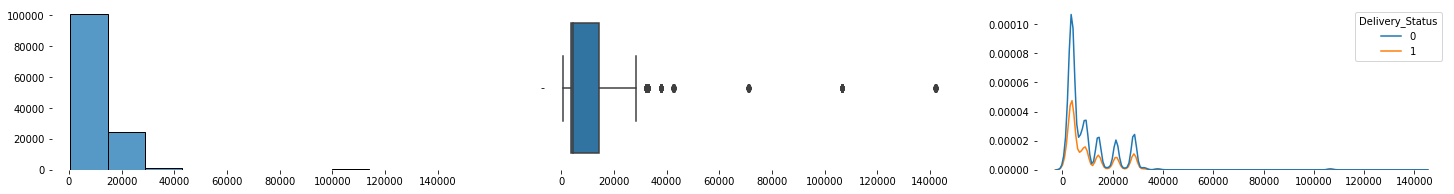

In [124]:
display_unq(df,'Price','Delivery_Status',10,'num','Price',textlab,textlab_tar,25,3)

**** Profit Ratio ****
**********************

╒══════════════╤═════════╤════════╤═══════╤═══════╤═══════╤═══════╤═══════╤═══════╕
│              │   count │   mean │   std │   min │   25% │   50% │   75% │   max │
╞══════════════╪═════════╪════════╪═══════╪═══════╪═══════╪═══════╪═══════╪═══════╡
│ Profit_Ratio │  126363 │   0.12 │  0.47 │ -2.75 │  0.08 │  0.28 │  0.37 │   0.5 │
╘══════════════╧═════════╧════════╧═══════╧═══════╧═══════╧═══════╧═══════╧═══════╛

**** Visuallations of Feature Profit Ratio ****
************************************************



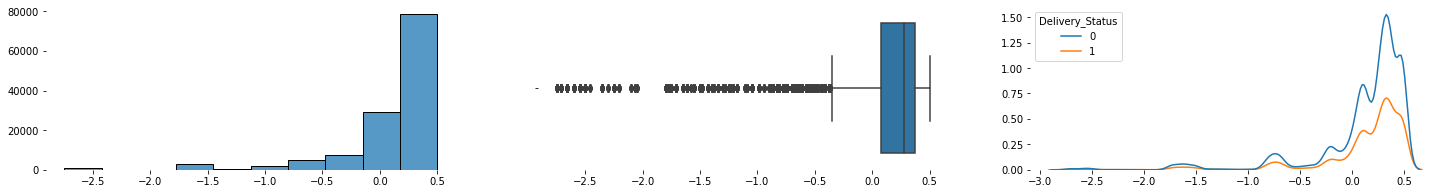

In [125]:
display_unq(df,'Profit_Ratio','Delivery_Status',10,'num','Profit Ratio',textlab,textlab_tar,25,3)

**** Discount ****
******************

╒══════════╤═════════╤════════╤═══════╤═══════╤═══════╤═══════╤═══════╤═══════╕
│          │   count │   mean │   std │   min │   25% │   50% │   75% │   max │
╞══════════╪═════════╪════════╪═══════╪═══════╪═══════╪═══════╪═══════╪═══════╡
│ Discount │  126363 │   0.11 │  0.07 │     0 │  0.04 │   0.1 │  0.16 │  0.25 │
╘══════════╧═════════╧════════╧═══════╧═══════╧═══════╧═══════╧═══════╧═══════╛

**** Visuallations of Feature Discount ****
********************************************



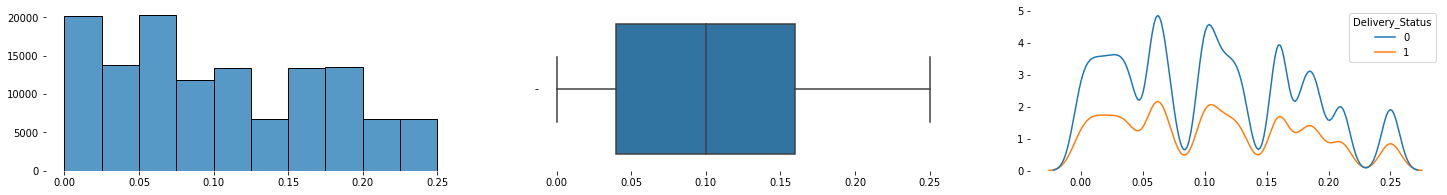

In [126]:
display_unq(df,'Discount','Delivery_Status',10,'num','Discount',textlab,textlab_tar,25,3)

**** Quantity ****
******************

╒══════════╤═════════╤════════╤═══════╤═══════╤═══════╤═══════╤═══════╤═══════╕
│          │   count │   mean │   std │   min │   25% │   50% │   75% │   max │
╞══════════╪═════════╪════════╪═══════╪═══════╪═══════╪═══════╪═══════╪═══════╡
│ Quantity │  126363 │   2.13 │  1.45 │     1 │     1 │     1 │     3 │     5 │
╘══════════╧═════════╧════════╧═══════╧═══════╧═══════╧═══════╧═══════╧═══════╛

**** Visuallations of Feature Quantity ****
********************************************



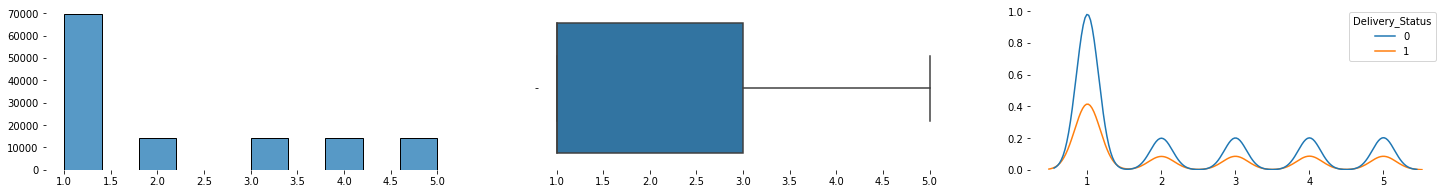

In [129]:
display_unq(df,'Quantity','Delivery_Status',10,'num','Quantity',textlab,textlab_tar,25,3)

**** Order Profit  ****
***********************

╒══════════════╤═════════╤═════════╤═════════╤═════════╤════════╤═════════╤════════╤═════════╕
│              │   count │    mean │     std │     min │    25% │     50% │    75% │     max │
╞══════════════╪═════════╪═════════╪═════════╪═════════╪════════╪═════════╪════════╪═════════╡
│ Order_Profit │  126363 │ 1257.02 │ 6690.79 │ -271606 │ 314.08 │ 1258.74 │ 3119.9 │ 68156.7 │
╘══════════════╧═════════╧═════════╧═════════╧═════════╧════════╧═════════╧════════╧═════════╛

**** Visuallations of Feature Order Profit  ****
*************************************************



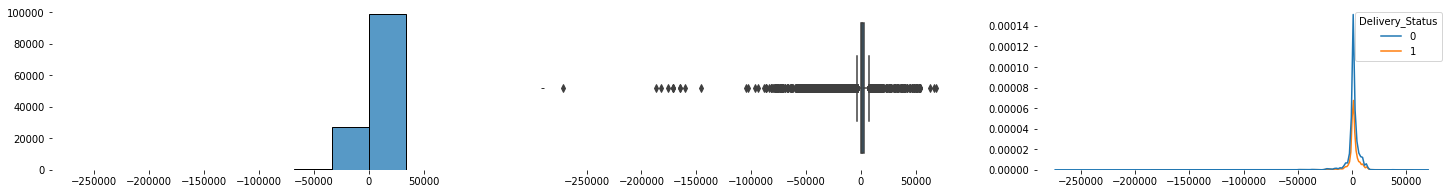

In [130]:
display_unq(df,'Order_Profit ','Delivery_Status',10,'num','Order Profit ',textlab,textlab_tar,25,3)

**** Productlength ****
***********************

╒═══════════════╤═════════╤════════╤═══════╤═══════╤═══════╤═══════╤═══════╤═══════╕
│               │   count │   mean │   std │   min │   25% │   50% │   75% │   max │
╞═══════════════╪═════════╪════════╪═══════╪═══════╪═══════╪═══════╪═══════╪═══════╡
│ ProductLength │  126363 │   95.7 │ 54.74 │    10 │    52 │    84 │   139 │   210 │
╘═══════════════╧═════════╧════════╧═══════╧═══════╧═══════╧═══════╧═══════╧═══════╛

**** Visuallations of Feature Productlength ****
*************************************************



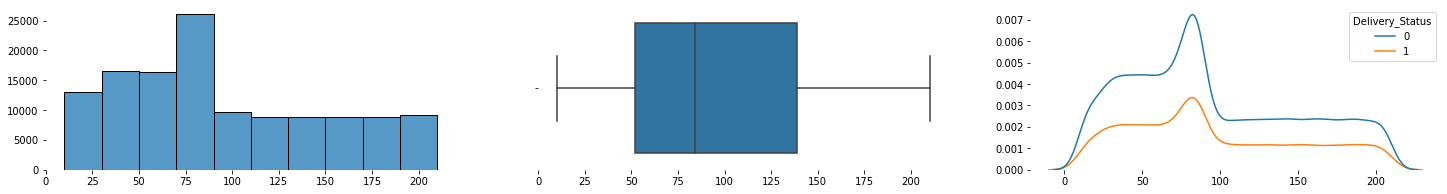

In [131]:
display_unq(df,'ProductLength','Delivery_Status',10,'num','Product Length',textlab,textlab_tar,25,3)

**** Product Weigh ****
***********************

╒═══════════════╤═════════╤═════════╤═════════╤═══════╤═══════╤═══════╤═══════╤═══════╕
│               │   count │    mean │     std │   min │   25% │   50% │   75% │   max │
╞═══════════════╪═════════╪═════════╪═════════╪═══════╪═══════╪═══════╪═══════╪═══════╡
│ ProductWeight │  126363 │ 3736.04 │ 7600.45 │    10 │   764 │  1640 │  2706 │ 43999 │
╘═══════════════╧═════════╧═════════╧═════════╧═══════╧═══════╧═══════╧═══════╧═══════╛

**** Visuallations of Feature Product Weigh ****
*************************************************



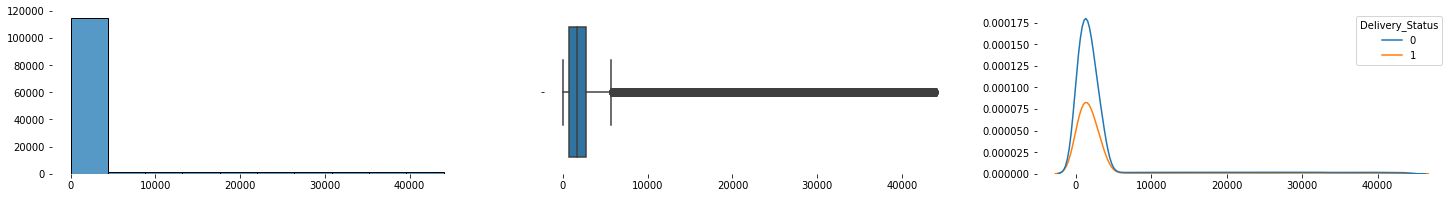

In [133]:
display_unq(df,'ProductWeight','Delivery_Status',10,'num','Product Weight',textlab,textlab_tar,25,3)